# Application of the practical prototype

In [1]:
from Preparation.Titanic_prep import model
from utils import keras2torch_converter, compression_loop
import keras
import pandas as pd

# titanic_keras = keras.models.load_model("Preparation/kaggle_titanic_model_new.keras")
titanic_keras = model

titanic_torch = keras2torch_converter(titanic_keras)

prune_data = pd.read_csv("Preparation/processed_to_prune.csv")
test_data = pd.read_csv("Preparation/processed_to_test_new.csv")

X_test = test_data.iloc[:, 1:]
y_test = test_data.iloc[:, 0]

c:\Users\Silas\Desktop\linearity based compression\Preparation\Titanic_prep.py:50: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['IsAlone'].loc[x_train['sp'] > 0] = 0
c:\Users\Silas\Desktop\linearity based compression\Preparation\Tit

(623,)
Epoch 1/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - acc: 0.5208 - loss: 1.2206 - val_acc: 0.6640 - val_loss: 0.6206
Epoch 2/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - acc: 0.7032 - loss: 0.7865 - val_acc: 0.7360 - val_loss: 0.6148
Epoch 3/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.6320 - loss: 0.8031 - val_acc: 0.7200 - val_loss: 0.5854
Epoch 4/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.6924 - loss: 0.8034 - val_acc: 0.7360 - val_loss: 0.5754
Epoch 5/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.7203 - loss: 0.7279 - val_acc: 0.7200 - val_loss: 0.5789
Epoch 6/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.7618 - loss: 0.7320 - val_acc: 0.7600 - val_loss: 0.5429
Epoch 7/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.7756 - loss: 0.6810 - val_acc: 0.7840 - val_loss: 0.5232
Epoch 8/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.7976 - loss: 0.6555 - val_acc: 0.8160 - val_loss: 0.5047
Epoch 9/2000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc:

In [ ]:
from compression.importance_based_pruning import Activation_based_pruning
from Preparation.FashionMNIST_prep import trainloader_fashion, validationloader_fashion, testloader_fashion
import pandas as pd

fashion_model = Activation_based_pruning(784, 10)
fashion_model.train(trainloader_fashion, 20, validationloader_fashion, 3)

prune_data_fashion = pd.concat([pd.DataFrame(data)  for data, _ in validationloader_fashion])

In [2]:
####### tmp ########
import torch
# torch.save(fashion_model.state_dict(), "fashion_model_state_dict.pt")

from compression.importance_based_pruning import Activation_based_pruning
from Preparation.FashionMNIST_prep import trainloader_fashion, validationloader_fashion, testloader_fashion
import pandas as pd

fashion_model = Activation_based_pruning(784, 10)
fashion_model.load_state_dict(torch.load("fashion_model_state_dict.pt"))
prune_data_fashion = pd.concat([pd.DataFrame(data)  for data, _ in validationloader_fashion])

In [3]:
# naive compression without a layerthreshold
compr_titanic_WO_layerthreshold = compression_loop(titanic_torch, prune_data, (X_test, y_test), layerthreshold= 0.0)
compr_Fashion_WO_layerthreshold = compression_loop(fashion_model, prune_data_fashion, testloader_fashion, layerthreshold= 0.0)

c:\Users\Silas\Desktop\linearity based compression\compression\compression.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  activations = model.extended_relu_forward(torch.as_tensor(val_data.iloc[line_idx], dtype=torch.float32))
C:\Users\Silas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\Users\Silas\Desktop\linearity based compression\Preparation\OpenML_prep.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Da

In [4]:
# compression with a absolute valued layerthreshold
compr_titanic_abs_layerthreshold = compression_loop(titanic_torch, prune_data, (X_test, y_test), layerthreshold= 20)
compr_Fashion_abs_layerthreshold = compression_loop(fashion_model, prune_data_fashion, testloader_fashion, layerthreshold= 200)

c:\Users\Silas\Desktop\linearity based compression\compression\compression.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  activations = model.extended_relu_forward(torch.as_tensor(val_data.iloc[line_idx], dtype=torch.float32))
C:\Users\Silas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\Users\Silas\Desktop\linearity based compression\Preparation\OpenML_prep.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Da

In [ ]:
# compression with a optimal valued layerthreshold
compr_titanic_opt_layerthreshold = compression_loop(titanic_torch, prune_data, (X_test, y_test), layerthreshold= "optimal")
compr_Fashion_opt_layerthreshold = compression_loop(fashion_model, prune_data_fashion, testloader_fashion, layerthreshold= "optimal")

c:\Users\Silas\Desktop\linearity based compression\compression\compression.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  activations = model.extended_relu_forward(torch.as_tensor(val_data.iloc[line_idx], dtype=torch.float32))
C:\Users\Silas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
c:\Users\Silas\Desktop\linearity based compression\Preparation\OpenML_prep.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Da

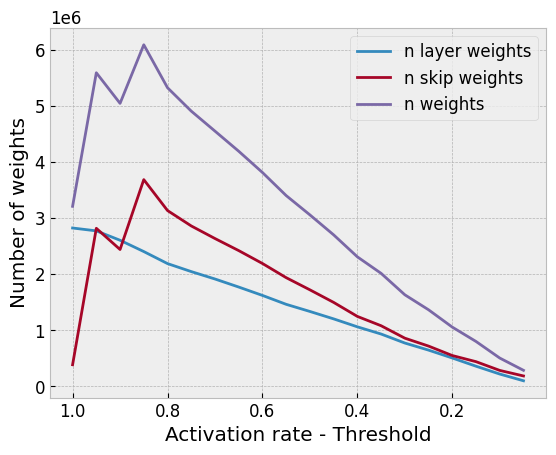

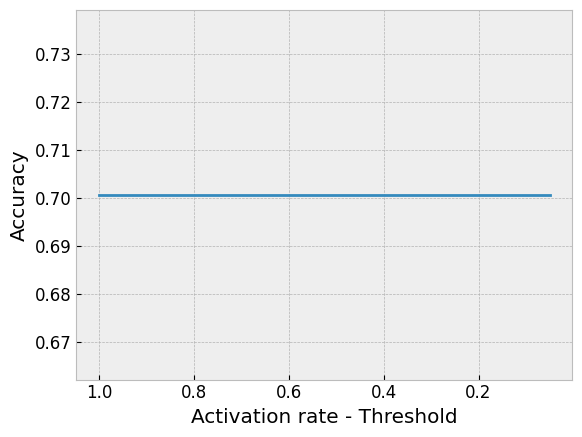

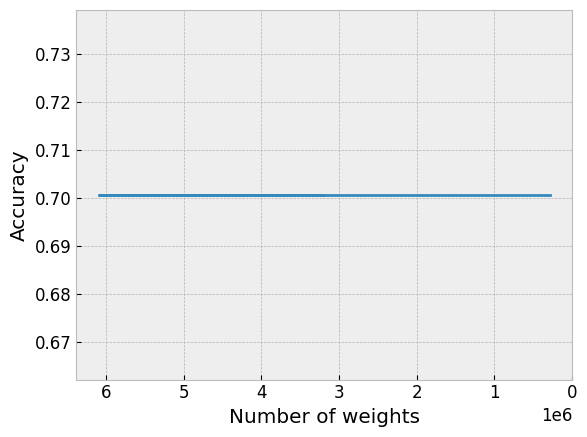

In [16]:
from plotting_functions import loss_plot, weight_plot, weight_loss_plot
import matplotlib.pyplot as plt
# change here for desired compression:
plotting_data = compr_Fashion_WO_layerthreshold

weight_plot(plotting_data)
loss_plot(plotting_data)
weight_loss_plot(plotting_data)

# Combination of compression techniques

C:\Users\Silas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor(0.0147)
(0, 0.7239999771118164, 0.7117999792098999, 2669689)
tensor(0.0663)
(1, 0.7213199734687805, 0.7116000056266785, 2391542)
tensor(0.1049)
(2, 0.7208200097084045, 0.711899995803833, 2137694)
tensor(0.1362)
(3, 0.7201399803161621, 0.7085999846458435, 1921554)
tensor(0.0132)
(0, 0.7280399799346924, 0.7264999747276306, 2668230)
tensor(0.0625)
(1, 0.7388399839401245, 0.7261999845504761, 2398289)
tensor(0.1051)
(2, 0.7383999824523926, 0.7246000170707703, 2143066)
tensor(0.1328)
(3, 0.7374799847602844, 0.722000002861023, 1926105)
tensor(0.0139)
(0, 0.7221400141716003, 0.7192000150680542, 2665697)
tensor(0.0640)
(1, 0.7300400137901306, 0.7186999917030334, 2397671)
tensor(0.1020)
(2, 0.7296000123023987, 0.7178999781608582, 2156513)
tensor(0.1322)
(3, 0.7282800078392029, 0.7149999737739563, 1926723)
tensor(0.0148)
(0, 0.7237200140953064, 0.7125999927520752, 2666395)
tensor(0.0649)
(1, 0.7241600155830383, 0.7103000283241272, 2395818)
tensor(0.1004)
(2, 0.7214599847793579, 0.705299973

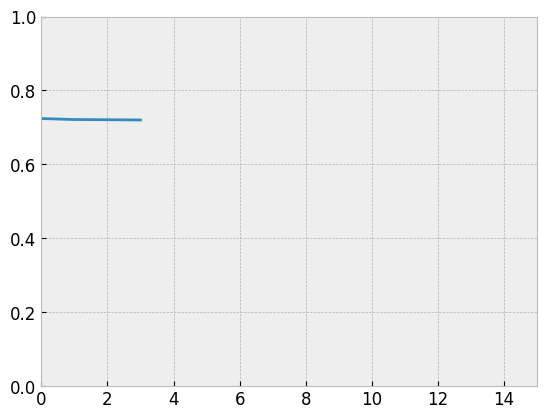

In [21]:
import copy

out = {}
for compression_percentage in [0.25, 0.40, 0.50]:
    for i in range(5):
        model = Activation_based_pruning(784, 10)
        model.load_state_dict(fashion_model.state_dict())
        out[f"{compression_percentage}compression_iteration{i + 1}"] = model.train_n_prune(trainloader_fashion, 15, 0.70, compression_percentage, 0.05, val_loader = validationloader_fashion)
        ## already saving the 60% sized model for later
        if compression_percentage == 0.40:
            import_pruned_model = copy.deepcopy(model)


for key, value in out.items():
    out[key] = list(value)


for key, values in out.items():
    values = pd.DataFrame(values, columns = ("epochs", "train_acc", "val_acc", "model_size"))
    plt.plot(values.epochs, values.train_acc, label = key)
    break

plt.xlim((0, 15))
plt.ylim(bottom = 0, top= 1)
plt.show()

In [22]:
combined_compression = compression_loop(import_pruned_model, prune_data_fashion, testloader_fashion, layerthreshold = "optimal")

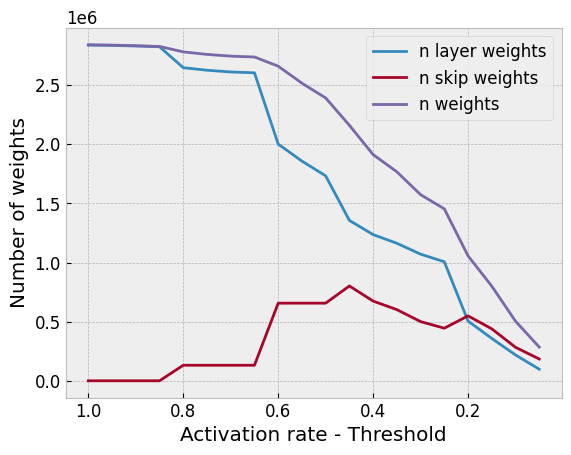

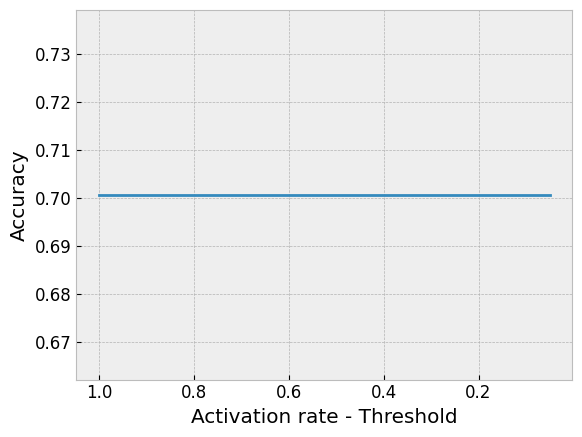

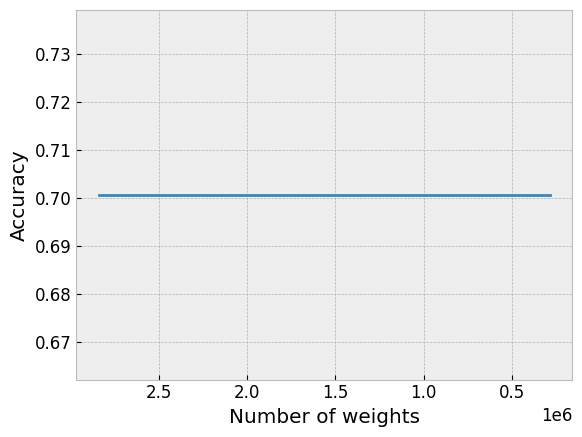

In [23]:
plotting_data = combined_compression

weight_plot(plotting_data)
loss_plot(plotting_data)
weight_loss_plot(plotting_data)

# OpenML

In [ ]:
import openml
import keras
import pandas as pd
from Preparation.OpenML_prep import define_model, preprocess_features, preprocess_labels, train_validation_test_split, evaluate, acc
from compression.compression import model_compression
from utils import keras2torch_converter

collection_weight_states = []

def task_compression(task_id):
    task = openml.tasks.get_task(task_id)
    data = task.get_dataset()
# preprocess data
    X, y, _, _ = data.get_data(target=data.default_target_attribute)
    X_train, X_val, X_test, y_train, y_val, y_test = train_validation_test_split(X, y)
    _, X_val = preprocess_features(X_train, X_val)
    X_train, X_test = preprocess_features(X_train, X_test)
    _, y_val = preprocess_labels(y_train, y_val)
    y_train, y_test = preprocess_labels(y_train, y_test)
    print(f"Data:{X.shape}")
# create model
    model = define_model(X_train, y_train)
# train model
    model.fit(X_train, y_train, epochs = 10, batch_size = 32, verbose = 0)
    print("trained")
# translate model
    torch_model = keras2torch_converter(model)
    collection_weight_states.append(torch_model.state_dict())
    com_model075 = model_compression(torch_model)
    com_model050 = model_compression(torch_model)
    com_model025 = model_compression(torch_model)
# compress model
    com_model075.seq_fixed_size_compression(pd.DataFrame(X_val),rate = 0.75, threshold_stepsize = 0.1)
    com_model050.seq_fixed_size_compression(pd.DataFrame(X_val),rate = 0.50, threshold_stepsize = 0.1)
    com_model025.seq_fixed_size_compression(pd.DataFrame(X_val),rate = 0.25, threshold_stepsize = 0.1)
    print("compressed")
# eval before and after
    original_loss = evaluate(pd.DataFrame(X_test), pd.DataFrame(y_test), torch_model, acc)
    compressed_loss075 = evaluate(pd.DataFrame(X_test), pd.DataFrame(y_test), com_model075, acc)
    compressed_loss050 = evaluate(pd.DataFrame(X_test), pd.DataFrame(y_test), com_model050, acc)
    compressed_loss025 = evaluate(pd.DataFrame(X_test), pd.DataFrame(y_test), com_model025, acc)
    return data.name, original_loss, compressed_loss075, compressed_loss050, compressed_loss025

keras.utils.set_random_seed(123)
benchmark_suite = openml.study.get_suite(99)
df_model_eval = pd.DataFrame(columns= ["model", "original_loss", "compression_loss075", "compression_loss050", "compression_loss025"])
for idx, task_id in enumerate(benchmark_suite.tasks):
    if idx in [25, 27, 40, 45, 63, 64, 65, 67, 68]:
        print(f"skipped {idx}")
        continue
    df_model_eval.loc[df_model_eval.shape[0] + 1] = task_compression(task_id)
    print(f"{idx}/ {len(benchmark_suite.tasks) - 1}")

In [ ]:
import torch.nn as nn

class generalOpenML(nn.Module):
    def __init__(self, in_dim, out_dim, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)

        self.layers = nn.Sequential()
        self.layers.append(nn.Linear(in_dim, 64))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Linear(64, 128))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Linear(128, 128))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Linear(128, 256))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Linear(256, 256))
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Linear(256, out_dim))
        if out_dim == 1:
            self.layers.append(nn.Sigmoid())
        else:
            self.layers.append(nn.Softmax())

In [ ]:
from utils import check_provable_linearity

for i in collection_weight_states:
    in_dim =list(i.values())[0].shape[1]
    out_dim = list(i.values())[-1].shape[0]

    mod = generalOpenML(in_dim, out_dim)
    mod.load_state_dict(i)

    print(check_provable_linearity(mod))

In [ ]:
fig, ax = plt.subplots()
ax.boxplot([df_model_eval["original_loss"], df_model_eval["compression_loss075"], df_model_eval["compression_loss050"], df_model_eval["compression_loss025"]])
ax.set_xticklabels(["original\nmodels", "75% sized\nmodels", "50% sized\nmodels", "25% sized\nmodel"])
plt.ylim((0, 1))
plt.ylabel("Accuracy")
# plt.savefig("path/to/save.svg", bbox_inches='tight')
plt.show()